In [1]:
%cd ..

/home/s-uesaka/augment_xgaze


In [2]:
from generate_augmented_dataset import get_eye_squares
from augment_sample import getsquare
from notebook_utils import get_normalized_image_and_lm, get_augmented_image_and_lm, get_concat_h, draw_lm, draw_horizontal_line
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np

/work/s-uesaka/xgaze_224_cam12_augmented/train/subject0100.h5


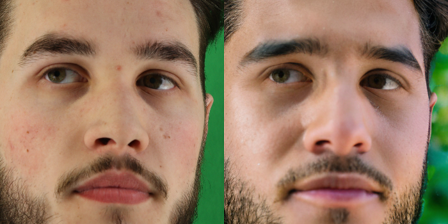

In [109]:
image, augmented_image, lm = get_augmented_image_and_lm(dataset_dir = Path("/work/s-uesaka/xgaze_224_cam12_augmented/train"),
                                        subject_number =57, #52, 57
                                        image_index = 1,
                                        random_sample=True,
                                        max_image_index=20)
get_concat_h(image, augmented_image)

/home/s-uesaka/datasets/xgaze_224_xgaze_prompt_augmented/train/subject0036.h5


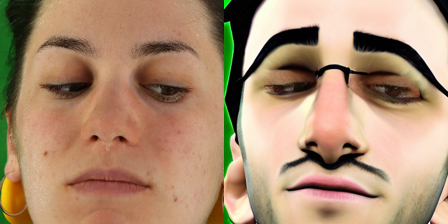

In [30]:
image, augmented_image, lm = get_augmented_image_and_lm(dataset_dir = Path("/home/s-uesaka/datasets/xgaze_224_xgaze_prompt_augmented/train"),
                                        subject_number =13, #52, 57
                                        image_index = 11,
                                        random_sample=True,
                                        max_image_index=20)
get_concat_h(image, augmented_image)

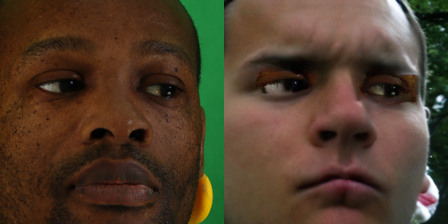

In [20]:
image, augmented_image, lm = get_augmented_image_and_lm(dataset_dir = Path("/work/s-uesaka/xgaze_224_mpii_prompt_augmented/train"),
                                        subject_number =13, #52, 57
                                        image_index = 11,
                                        random_sample=False,
                                        max_image_index=20)
get_concat_h(image, augmented_image)

In [29]:
import h5py
import random
dataset_dir = Path("/work/s-uesaka/xgaze_224_cam12_augmented/train")

for h5_path in dataset_dir.iterdir():
    with h5py.File(h5_path, 'r', libver='latest', swmr=True) as f:
        if f['cam_index'][0] != 1 and  f['cam_index'][1]:
            print(h5_path)

# check if any file is too small
[f.stat().st_size/1024/1024/1024 for f in dataset_dir.glob('**/*') if f.is_file()]

[0.3083627438172698,
 0.10825731139630079,
 0.29620923940092325,
 0.24491364508867264,
 0.3164292871952057,
 0.3220051219686866,
 0.32415906991809607,
 0.32090388238430023,
 0.09959586430341005,
 0.31301260367035866,
 0.3076398717239499,
 0.24165009520947933,
 0.24436162039637566,
 0.2379782609641552,
 0.23554683942347765,
 0.24120570346713066,
 0.2655435921624303,
 0.3160536587238312,
 0.22454153280705214,
 0.2552929436787963,
 0.3177900826558471,
 0.3021534588187933,
 0.32846609503030777,
 0.24184778612107038,
 0.21071818470954895,
 0.3035637531429529,
 0.29527355544269085,
 0.32339685037732124,
 0.2685314202681184,
 0.3070796299725771,
 0.30496929213404655,
 0.26240617595613003,
 0.31271571666002274,
 0.28186274878680706,
 0.22179177030920982,
 0.3247176483273506,
 0.32145064417272806,
 0.29849475156515837,
 0.2746843593195081,
 0.22304065711796284,
 0.2885796017944813,
 0.2897417191416025,
 0.3103109486401081,
 0.3045671107247472,
 0.2902413113042712,
 0.20931356959044933,
 0.31615

In [6]:
np.where(cam_index_selected)[0]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_1639784/2176899449.py:1 in <module>                                               │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_1639784/2176899449.py'                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'cam_index_selected' is not defined

In [27]:
with h5py.File("/work/jqin/diffusion_iccv/xgaze_512/train/subject0057.h5", 'r', libver='latest', swmr=True) as f:
    print(f.keys())
    print(f['cam_index'].shape)
    cam_index_data = f['cam_index'][sample_index[0]]
    print(cam_index_data)

<KeysViewHDF5 ['cam_index', 'face_gaze', 'face_head_pose', 'face_mat_norm', 'face_patch', 'frame_index', 'landmarks_norm']>
(10476,)
1


/work/jqin/diffusion_iccv/xgaze_512/train/subject0092.h5
Image Index: 9, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0092.h5 CameraIndex: 10


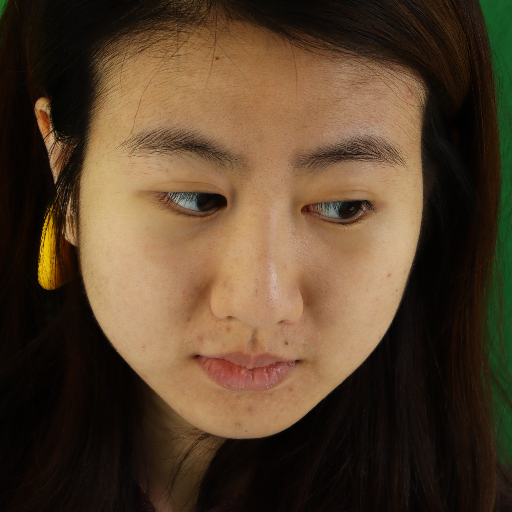

In [146]:
image, lm = get_normalized_image_and_lm(dataset_dir = Path("/work/jqin/diffusion_iccv/xgaze_512/train"),
                                        subject_number =92,
                                        image_index = 9,
                                        random_sample=False,
                                        max_image_index=40)
image

In [57]:
import random
def get_normalized_image_and_lm(dataset_dir: Path = Path("/work/jqin/diffusion_iccv/xgaze_512/train"), subject_number: int = 0, image_index = 0, random_sample=False, max_image_index=100):
    max_try = 20
    tries = 0
    
    if random_sample:
        while True: 
            image_index = random.randint(0,max_image_index)
            subject_path = random.choice(list(dataset_dir.iterdir()))
            
            if subject_path.suffix == ".h5":
                break
            if tries > max_try:
                raise Exception
            tries += 1
    else:
        subject_path = dataset_dir / f"subject{subject_number:04}.h5"
    assert subject_path.is_file()
    print(subject_path)
    with h5py.File(subject_path, 'r', libver='latest', swmr=True) as f:
        print(f.keys())
        image = f['face_patch'][image_index]
        #landmark = (f['landmarks'][image_index])
        print(f"Image Index: {image_index}, Path: {subject_path} CameraIndex: {f['cam_index'][image_index]}")

        
    return Image.fromarray(image[:,:,::-1]), landmark

/work/s-uesaka/xgaze_224/train/subject0108.h5
<KeysViewHDF5 ['cam_index', 'face_gaze', 'face_head_pose', 'face_mat_norm', 'face_patch', 'frame_index']>
Image Index: 0, Path: /work/s-uesaka/xgaze_224/train/subject0108.h5 CameraIndex: [1]


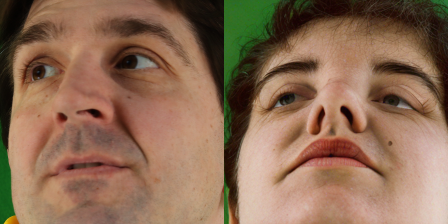

In [215]:
image, lm = get_normalized_image_and_lm(dataset_dir = Path("/work/s-uesaka/xgaze_224/train"),
                                        subject_number =57,
                                        image_index = 30,
                                        random_sample=True,
                                                       max_image_index=30)
get_concat_h(image, augmented_image)

In [156]:
import h5py
with h5py.File(Path('/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p00.h5'), 'r', libver='latest', swmr=True) as f:
        image = f['face_patch'][20]
        landmark = (f['landmarks'][0])
        print(f.keys())

<KeysViewHDF5 ['face_gaze', 'face_head_pose', 'face_patch', 'landmarks']>


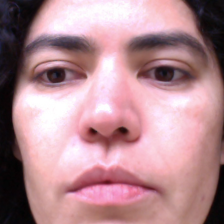

In [157]:
Image.fromarray(image.astype(np.uint8)[:,:,::-1])

In [80]:
image.shape

(224, 224, 3)